In [1]:
import numpy as np
import matplotlib.pyplot as plt

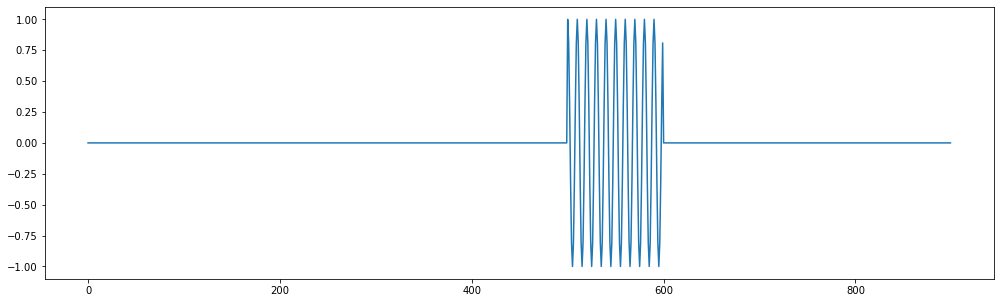

In [2]:
# Creating sinusoidal signal

n = np.arange(100)
first_part = np.zeros(500)
second_part = np.cos(2 * np.pi * 0.1 * n)
third_part = np.zeros(300)
y = np.concatenate([first_part, second_part,third_part])


plt.figure(figsize=(17, 5))
plt.plot(y)
plt.show()

/home/ara/anaconda3/envs/sound/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


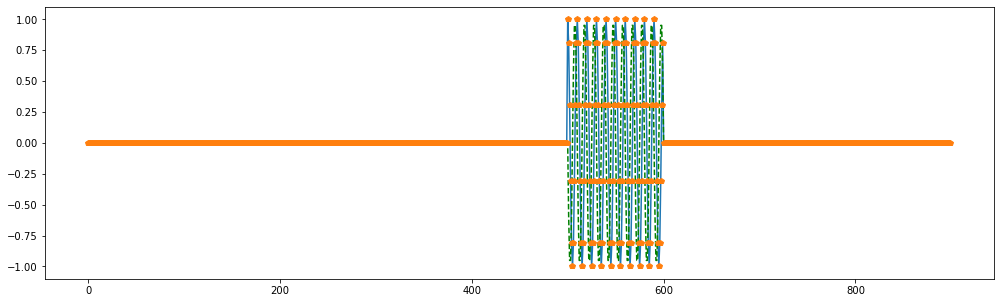

In [25]:
# Sinusoidal signal 

mid_part = np.exp(-1j*2*np.pi*0.1*n) 

y_exp = np.concatenate([first_part, mid_part,third_part])
y_exp_= y_exp + np.sqrt(0.5) * np.random.randn(y_exp.size) 

plt.figure(figsize=(17, 5))
plt.plot(y_exp)
plt.plot(np.imag(y_exp),'g--')
plt.plot(np.real(y_exp),'p')
plt.show()

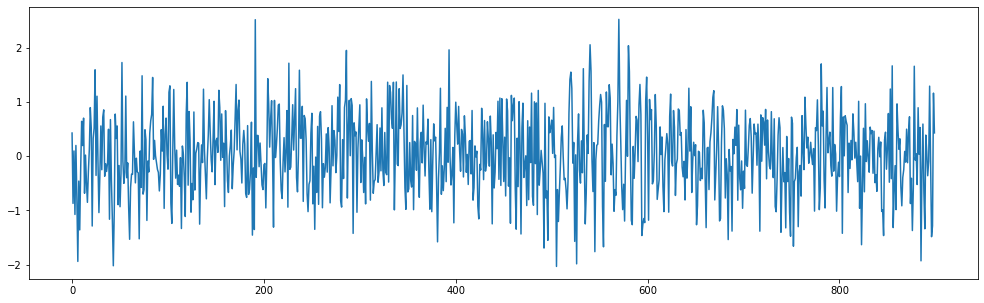

In [11]:
# Noisy signal
y_n = y + np.sqrt(0.5) * np.random.randn(y.size)

plt.figure(figsize=(17, 5))
plt.plot(y_n)
plt.show()

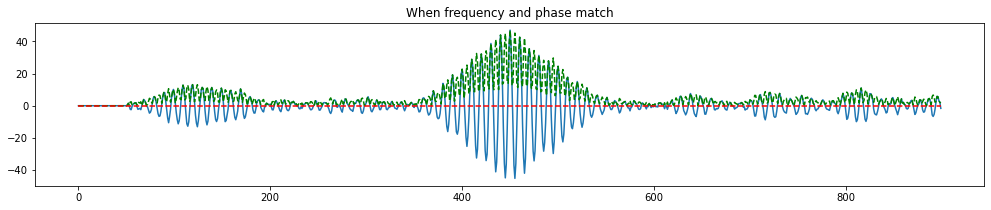

In [17]:

y_conv = np.convolve(y, np.flip(y_n), 'same')
y_conv2 = np.convolve(y, np.flip(y_exp_), 'same')

plt.figure(figsize=(17, 3))
plt.plot(y_conv)
plt.plot(np.abs(y_conv),'g--',label='Abs')
#plt.plot(np.real(y_conv),'b--',label='real')
plt.plot(np.imag(y_conv),'r--')

plt.title('When frequency and phase match')
plt.show()

/home/ara/anaconda3/envs/sound/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


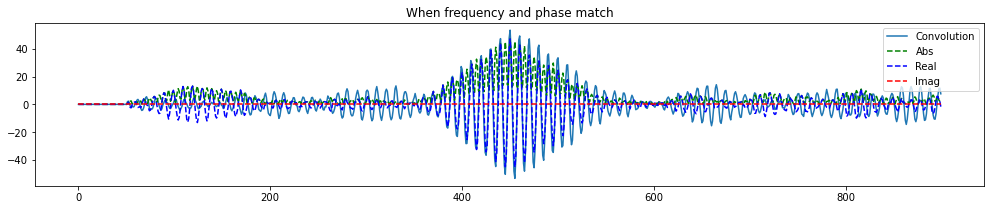

In [20]:

plt.figure(figsize=(17, 3))
plt.plot(y_conv2, label='Convolution')
plt.plot(np.abs(y_conv),'g--',label='Abs')
plt.plot(np.real(y_conv),'b--',label='Real')
plt.plot(np.imag(y_conv),'r--',label='Imag')


plt.legend(loc='upper right', frameon=True)
plt.title('When frequency and phase match')
plt.show()

In [65]:
# Detection 1 threshold gammma

gamma = np.sum(y*y_n)  
print(gamma)

result = []
for i in range(len(y)):
    if y_conv[i] >= gamma:
        result.append(i)
    
print(result)    

#???????????????????????????
# Detection 2
y_2_ = np.exp(-1j*2*np.pi*0.1*n)+ np.sqrt(0.5) * np.random.randn(y.size) 
print(gamma2)


result2 = []
for i in range(len(y)):
    for k in range(len(gamma2)):
        if np.real(y_conv[i]) >= np.real(gamma2[k]) and np.imag(y_conv[i]) >= np.imag(gamma2[k]) :
            result2.append(i)
            break;
    
print(result2)  

56.065725313001764
[450]
[-3.77475828e-15+0.00000000e+00j -3.05384360e-15+2.21874725e-15j
 -1.16646446e-15+3.59000846e-15j  1.16646446e-15+3.59000846e-15j
  3.05384360e-15+2.21874725e-15j  3.77475828e-15+4.62274565e-31j
  3.05384360e-15-2.21874725e-15j  1.16646446e-15-3.59000846e-15j
 -1.16646446e-15-3.59000846e-15j -3.05384360e-15-2.21874725e-15j
 -3.77475828e-15-9.24549130e-31j -3.05384360e-15+2.21874725e-15j
 -1.16646446e-15+3.59000846e-15j  1.16646446e-15+3.59000846e-15j
  3.05384360e-15+2.21874725e-15j  3.77475828e-15+1.38682369e-30j
  3.05384360e-15-2.21874725e-15j  1.16646446e-15-3.59000846e-15j
 -1.16646446e-15-3.59000846e-15j -3.05384360e-15-2.21874725e-15j
 -3.77475828e-15-1.84909826e-30j -3.05384360e-15+2.21874725e-15j
 -1.16646446e-15+3.59000846e-15j  1.16646446e-15+3.59000846e-15j
  3.05384360e-15+2.21874725e-15j  3.77475828e-15+2.31137282e-30j
  3.05384360e-15-2.21874725e-15j  1.16646446e-15-3.59000846e-15j
 -1.16646446e-15-3.59000846e-15j -3.05384360e-15-2.21874725e-15j


In [57]:
y_conv[500]

32.37604033472702

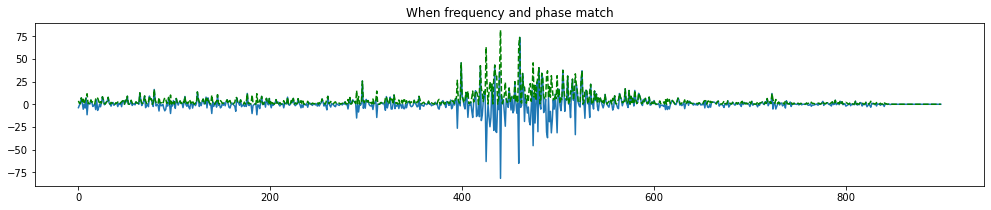

In [29]:
conv_ = []

for i in range(len(y)):
    conv_.append(y[len(signal)-i-1]*y_n[i])

    
plt.figure(figsize=(17, 3))
plt.plot(conv_)
plt.plot(np.abs(conv_),'g--')
plt.title('When frequency and phase match')
plt.show()